Sanket Gadekar (Infosys: AI Intern)

## MILESTONE 1: Data Preprocessing and AWS Integration

# A. Data Preprocessing

### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [32]:
file = 'Online_Payment_Raw_Dataset.csv'
df = pd.read_csv(file)

In [33]:
df.shape

(16426, 11)

### Display Dataframe

In [34]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,288,CASH_OUT,722832.95,C707039983,722832.95,0.00,C100431989,0.00,722832.95,1,0
1,10,CASH_OUT,228264.60,C1522207806,0.00,0.00,C748261222,643390.26,871654.86,0,0
2,352,CASH_OUT,249222.80,C335496248,19198.00,0.00,C907110125,906682.02,1155904.82,0,0
3,211,TRANSFER,55920.39,C588214650,55920.39,0.00,C1302604885,0.00,0.00,1,0
4,261,CASH_OUT,163353.64,C1415552520,163353.64,0.00,C1498741927,5100683.15,5264036.79,1,0
5,348,TRANSFER,914767.58,C1440212855,0.00,0.00,C144549863,1531661.49,2446429.07,0,0
6,148,TRANSFER,3733104.07,C492529807,3733104.07,0.00,C863881747,0.00,0.00,1,0
7,38,PAYMENT,14091.48,C364282560,12164.00,0.00,M27542436,0.00,0.00,0,0
8,306,PAYMENT,10275.97,C365569894,57594.74,47318.76,M1865584698,0.00,0.00,0,0
9,9,CASH_OUT,321045.95,C2108848465,571080.63,250034.68,C191891167,20437.00,549527.02,0,0


### Statistical Summary of Dataframe

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


In [36]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,305.583222,8.235107e+05,1.236681e+06,5.189730e+05,8.197630e+05,1.249162e+06,0.500000,0.000974
std,193.895534,1.861568e+06,3.270866e+06,2.525610e+06,3.802480e+06,4.164575e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.684810e+04,1.078750e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.684456e+05,1.150297e+05,0.000000e+00,0.000000e+00,1.180377e+05,0.500000,0.000000
75%,409.000000,5.422141e+05,7.865499e+05,0.000000e+00,4.959398e+05,1.054824e+06,1.000000,0.000000
max,743.000000,2.636443e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


### Handle duplicate values

In [37]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 0


In [38]:
# if duplicates found then use:
# df = df.drop_duplicates()

### Check for Missing Values

In [39]:
null_values = df.isnull().sum()
print(null_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [40]:
# If there any null values your can drop thoes rows by using:
# df = df.dropna()

### Visual representation for Types of Transaction

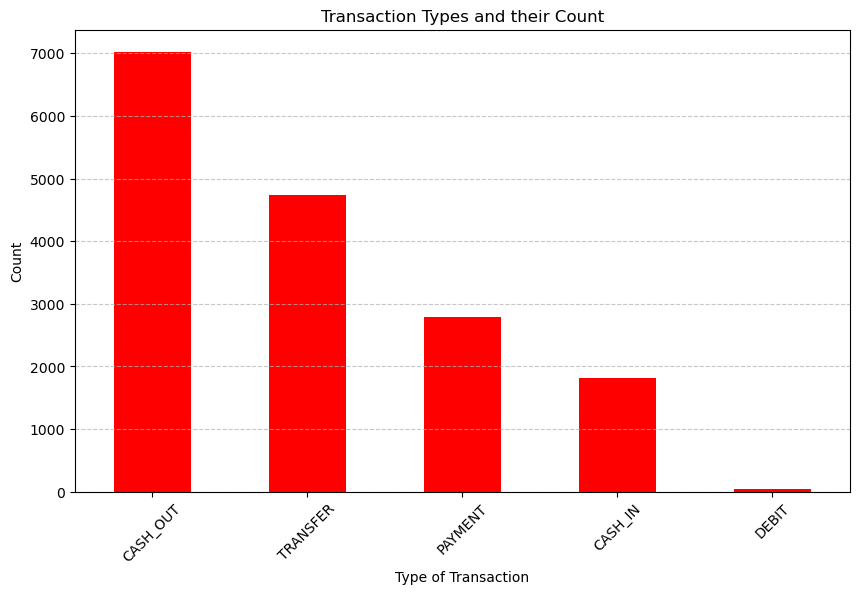

In [41]:
# Count for each transaction type
type_counts = df['type'].value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='red')
plt.title('Transaction Types and their Count')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Finding the correlation using Heatmap

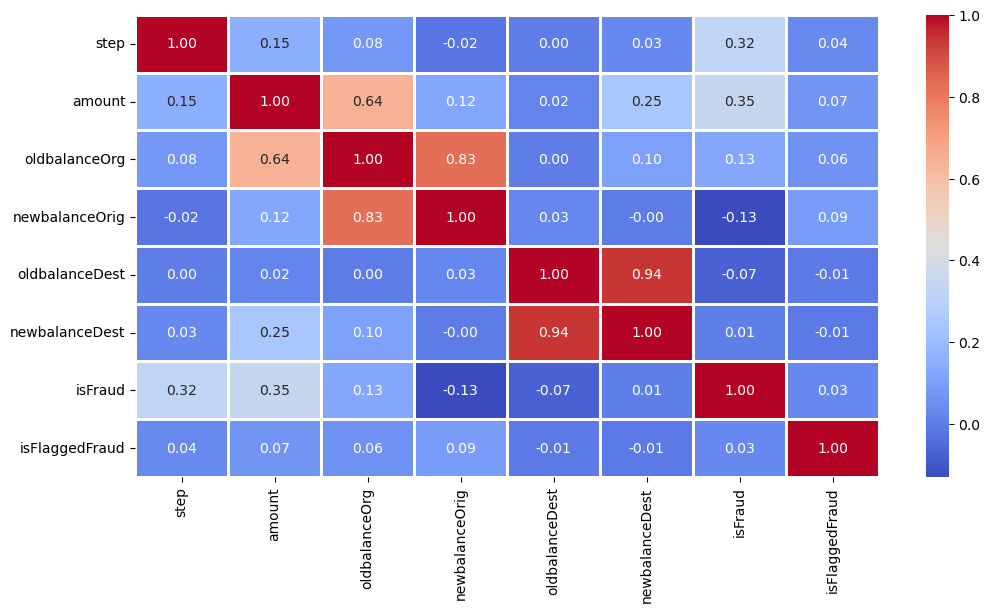

In [42]:
numeric_data = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='coolwarm',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

With a heatmap, we can quickly spot clusters of highly correlated variables and drop them for ease of model training and data overloading.

### Deleting Unnecessary / Redundant Columns

In [43]:
columns_to_drop = ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
df = df.drop(columns=columns_to_drop)

In [44]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,CASH_OUT,722832.95,722832.95,0.00,1
1,CASH_OUT,228264.60,0.00,0.00,0
2,CASH_OUT,249222.80,19198.00,0.00,0
3,TRANSFER,55920.39,55920.39,0.00,1
4,CASH_OUT,163353.64,163353.64,0.00,1
5,TRANSFER,914767.58,0.00,0.00,0
6,TRANSFER,3733104.07,3733104.07,0.00,1
7,PAYMENT,14091.48,12164.00,0.00,0
8,PAYMENT,10275.97,57594.74,47318.76,0
9,CASH_OUT,321045.95,571080.63,250034.68,0


### Is Dataset Balanced?

In [45]:
df['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

Yes, as the 'Fraudulant' and 'Non-Fraudulant' Value Count is same.

### Save the Final Dataset

In [46]:
df.to_csv('Final_Cleaned_Dataset.csv', index=False)

# B. Integration of AWS S3 Bucket

### Initialize the Session using credentials

In [47]:
import boto3

session = boto3.Session(
    aws_access_key_id='your_aws_access_key_id',
    aws_secret_access_key='your_aws_secret_access_key++lx9PzOS4cAPDb',
    region_name='your_region_name'
)

### Access s3 Resources

In [48]:
s3 = session.resource('s3')

### Define the Bucket

In [49]:
bucket_name = 'online-fraud-detection-internship'
bucket = s3.Bucket(bucket_name)

### Upload the File to Bucket

In [50]:
file_name = 'Final_Cleaned_Dataset.csv'                 # Path of local file
s3_file_name = 'Sanket_Gadekar_Final_Dataset.csv'       # File Name Which will be used in Bucket

try:
    bucket.upload_file(file_name, s3_file_name)
    print(f'Successfully uploaded {file_name} to {bucket_name}/{s3_file_name}')
except Exception as e:
    print(f'Error uploading file: {e}')

Successfully uploaded Final_Cleaned_Dataset.csv to online-fraud-detection-internship/Sanket_Gadekar_Final_Dataset.csv


### Check the Upload in Bucket by Listing Files

In [ ]:
print(f'Files in bucket {bucket_name}:')
for obj in bucket.objects.all():
    print(obj.key)

### Download our file from the Bucket

In [52]:
download_path = r'E:\Sanket_Gadekar_Final_Dataset.csv'       # Location of download

try:
    bucket.download_file(s3_file_name, download_path)
    print(f'Successfully downloaded {s3_file_name} to {download_path}')
except Exception as e:
    print(f'Error downloading file: {e}')

Successfully downloaded Sanket_Gadekar_Final_Dataset.csv to E:\Sanket_Gadekar_Final_Dataset.csv
